<a href="https://colab.research.google.com/github/ssujith18/capston/blob/main/gemini/prompts/intro_prompt_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

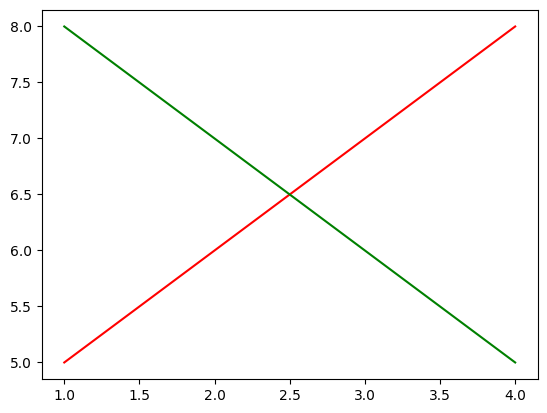

In [2]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [5, 6, 7, 8], color='red')  # Using color name
plt.plot([1, 2, 3, 4], [8, 7, 6, 5], color=(0, 0.5, 0))  # Using RGB values
plt.show()

# Prompt Design - Best Practices

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/prompts/intro_prompt_design.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fprompts%2Fintro_prompt_design.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/prompts/intro_prompt_design.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/prompts/intro_prompt_design.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://goo.gle/4fWHlze">
      <img width="32px" src="https://cdn.qwiklabs.com/assets/gcp_cloud-e3a77215f0b8bfa9b3f611c0d2208c7e8708ed31.svg" alt="Google Cloud logo"><br> Open in  Cloud Skills Boost
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/prompts/intro_prompt_design.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/prompts/intro_prompt_design.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/prompts/intro_prompt_design.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/prompts/intro_prompt_design.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/prompts/intro_prompt_design.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>            

| | |
|-|-|
|Author(s) | [Polong Lin](https://github.com/polong-lin), [Karl Weinmeister](https://github.com/kweinmeister) |

## Overview

This notebook covers the essentials of prompt engineering, including some best practices.

Learn more about prompt design in the [official documentation](https://cloud.google.com/vertex-ai/docs/generative-ai/text/text-overview).

In this notebook, you learn best practices around prompt engineering -- how to design prompts to improve the quality of your responses.

This notebook covers the following best practices for prompt engineering:

- Be concise
- Be specific and well-defined
- Ask one task at a time
- Turn generative tasks into classification tasks
- Improve response quality by including examples

## Getting Started

### Install Google Gen AI SDK


In [ ]:
%pip install --upgrade --quiet google-genai

### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment (Colab only)

Authenticate your environment on Google Colab.


In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries


In [ ]:
from IPython.display import Markdown, display
from google import genai
from google.genai.types import GenerateContentConfig

### Set Google Cloud project information and create client

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [ ]:
import os

PROJECT_ID = "[your-project-id]"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

In [ ]:
client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

### Load model

Learn more about all [Gemini models on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models#gemini-models).

In [ ]:
MODEL_ID = "gemini-2.0-flash-001"  # @param {type: "string"}

## Prompt engineering best practices

Prompt engineering is all about how to design your prompts so that the response is what you were indeed hoping to see.

The idea of using "unfancy" prompts is to minimize the noise in your prompt to reduce the possibility of the LLM misinterpreting the intent of the prompt. Below are a few guidelines on how to engineer "unfancy" prompts.

In this section, you'll cover the following best practices when engineering prompts:

* Be concise
* Be specific, and well-defined
* Ask one task at a time
* Improve response quality by including examples
* Turn generative tasks to classification tasks to improve safety

### Be concise

🛑 Not recommended. The prompt below is unnecessarily verbose.

In [ ]:
prompt = "What do you think could be a good name for a flower shop that specializes in selling bouquets of dried flowers more than fresh flowers?"

response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

✅ Recommended. The prompt below is to the point and concise.

In [ ]:
prompt = "Suggest a name for a flower shop that sells bouquets of dried flowers"

response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

### Be specific, and well-defined

Suppose that you want to brainstorm creative ways to describe Earth.

🛑 The prompt below might be a bit too generic (which is certainly OK if you'd like to ask a generic question!)

In [ ]:
prompt = "Tell me about Earth"

response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

✅ Recommended. The prompt below is specific and well-defined.

In [ ]:
prompt = "Generate a list of ways that makes Earth unique compared to other planets"

response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

### Ask one task at a time

🛑 Not recommended. The prompt below has two parts to the question that could be asked separately.

In [ ]:
prompt = "What's the best method of boiling water and why is the sky blue?"

response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

✅ Recommended. The prompts below asks one task a time.

In [ ]:
prompt = "What's the best method of boiling water?"

response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

In [ ]:
prompt = "Why is the sky blue?"

response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

### Watch out for hallucinations

Although LLMs have been trained on a large amount of data, they can generate text containing statements not grounded in truth or reality; these responses from the LLM are often referred to as "hallucinations" due to their limited memorization capabilities. Note that simply prompting the LLM to provide a citation isn't a fix to this problem, as there are instances of LLMs providing false or inaccurate citations. Dealing with hallucinations is a fundamental challenge of LLMs and an ongoing research area, so it is important to be cognizant that LLMs may seem to give you confident, correct-sounding statements that are in fact incorrect.

Note that if you intend to use LLMs for the creative use cases, hallucinating could actually be quite useful.

Try the prompt like the one below repeatedly. We set the temperature to `1.0` so that it takes more risks in its choices. It's possible that it may provide an inaccurate, but confident answer.

In [ ]:
generation_config = GenerateContentConfig(temperature=1.0)

prompt = "What day is it today?"

response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

Since LLMs do not have access to real-time information without further integrations, you may have noticed it hallucinates what day it is today in some of the outputs.

### Using system instructions to guardrail the model from irrelevant responses

How can we attempt to reduce the chances of irrelevant responses and hallucinations?

One way is to provide the LLM with [system instructions](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/send-chat-prompts-gemini#system-instructions).

Let's see how system instructions works and how you can use them to reduce hallucinations or irrelevant questions for a travel chatbot.

Suppose we ask a simple question about one of Italy's most famous tourist spots.

In [ ]:
generation_config = GenerateContentConfig(temperature=1.0)

chat = client.chats.create(
    model=MODEL_ID,
    config=GenerateContentConfig(
        system_instruction=[
            "Hello! You are an AI chatbot for a travel web site.",
            "Your mission is to provide helpful queries for travelers.",
            "Remember that before you answer a question, you must check to see if it complies with your mission.",
            "If not, you can say, Sorry I can't answer that question.",
        ]
    ),
)

prompt = "What is the best place for sightseeing in Milan, Italy?"

response = chat.send_message(prompt)
display(Markdown(response.text))

Now let us pretend to be a user asks the chatbot a question that is unrelated to travel.

In [ ]:
prompt = "What is the best place for sightseeing in Milan, Italy?"

response = chat.send_message(prompt)
display(Markdown(response.text))

You can see that this way, a guardrail in the prompt prevented the chatbot from veering off course.

### Turn generative tasks into classification tasks to reduce output variability

#### Generative tasks lead to higher output variability

The prompt below results in an open-ended response, useful for brainstorming, but response is highly variable.

In [ ]:
prompt = "I'm a high school student. Recommend me a programming activity to improve my skills."

response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

#### Classification tasks reduces output variability

The prompt below results in a choice and may be useful if you want the output to be easier to control.

In [ ]:
prompt = """I'm a high school student. Which of these activities do you suggest and why:
a) learn Python
b) learn JavaScript
c) learn Fortran
"""

response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

### Improve response quality by including examples

Another way to improve response quality is to add examples in your prompt. The LLM learns in-context from the examples on how to respond. Typically, one to five examples (shots) are enough to improve the quality of responses. Including too many examples can cause the model to over-fit the data and reduce the quality of responses.

Similar to classical model training, the quality and distribution of the examples is very important. Pick examples that are representative of the scenarios that you need the model to learn, and keep the distribution of the examples (e.g. number of examples per class in the case of classification) aligned with your actual distribution.

#### Zero-shot prompt

Below is an example of zero-shot prompting, where you don't provide any examples to the LLM within the prompt itself.

In [ ]:
prompt = """Decide whether a Tweet's sentiment is positive, neutral, or negative.

Tweet: I loved the new YouTube video you made!
Sentiment:
"""

response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

#### One-shot prompt

Below is an example of one-shot prompting, where you provide one example to the LLM within the prompt to give some guidance on what type of response you want.

In [ ]:
prompt = """Decide whether a Tweet's sentiment is positive, neutral, or negative.

Tweet: I loved the new YouTube video you made!
Sentiment: positive

Tweet: That was awful. Super boring 😠
Sentiment:
"""

response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

#### Few-shot prompt

Below is an example of few-shot prompting, where you provide a few examples to the LLM within the prompt to give some guidance on what type of response you want.

In [ ]:
prompt = """Decide whether a Tweet's sentiment is positive, neutral, or negative.

Tweet: I loved the new YouTube video you made!
Sentiment: positive

Tweet: That was awful. Super boring 😠
Sentiment: negative

Tweet: Something surprised me about this video - it was actually original. It was not the same old recycled stuff that I always see. Watch it - you will not regret it.
Sentiment:
"""

response = client.models.generate_content(model=MODEL_ID, contents=prompt)
display(Markdown(response.text))

#### Choosing between zero-shot, one-shot, few-shot prompting methods

Which prompt technique to use will solely depends on your goal. The zero-shot prompts are more open-ended and can give you creative answers, while one-shot and few-shot prompts teach the model how to behave so you can get more predictable answers that are consistent with the examples provided.